# 2D convolutions


In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from scipy import linalg, signal


Consider a 2D signal $\mathbf{v}$ representing a picture


(np.float64(-0.5), np.float64(496.5), np.float64(371.5), np.float64(-0.5))

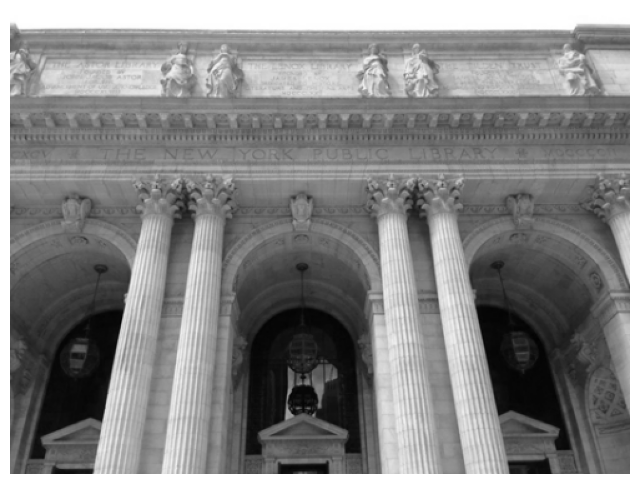

In [2]:
from pathlib import Path

# write here the import path of the image
image_path = Path("./NYlibrary.png")

v = np.mean(imread(image_path), axis=2)

plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

Consider the following kernels


In [3]:
kernel_blur1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10, 10)) / 100

kernel_edge1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_edge2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_edge3 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

kernel_sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel_drunk = np.random.randn(50, 50)

Choose here the desired filter $\mathbf{k}$


In [7]:
kernels = [(kernel_blur1,"Blur"), (kernel_drunk,"Drunk"), (kernel_edge1,"Edge"), (kernel_sobel_horizontal,"Sobel Horizontal"), (kernel_sharpen,"Sharpen")]

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.


## 1. Direct definition (sums of products)

Convolution without "boundary layers"


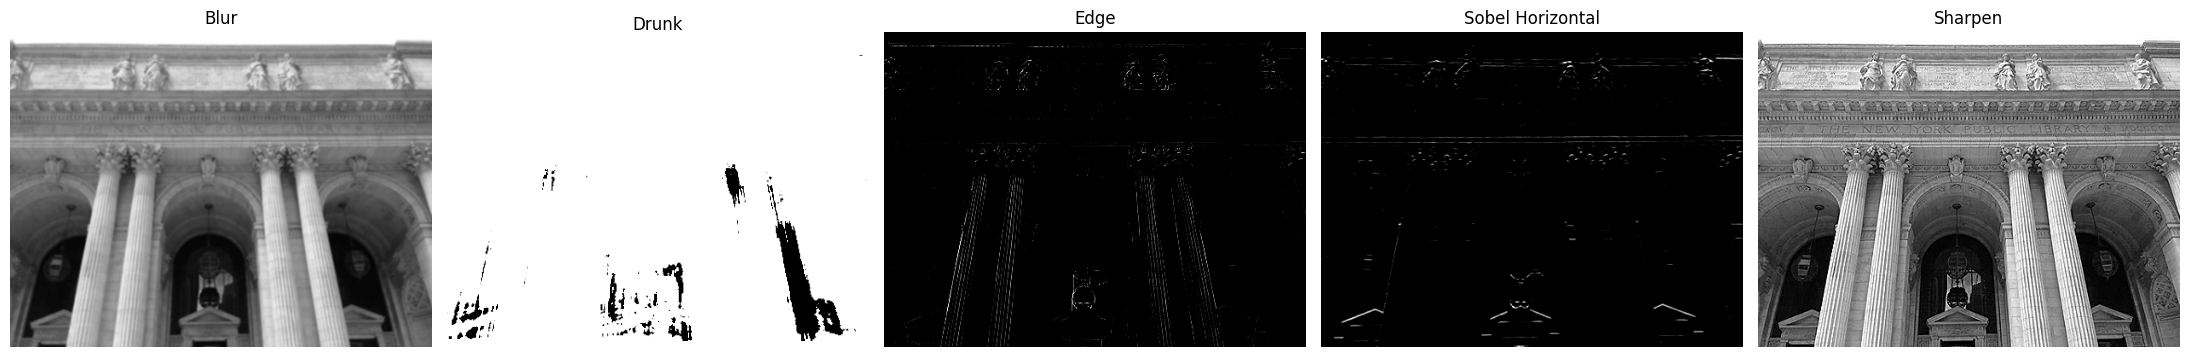

In [11]:
fig, axs = plt.subplots(1, len(kernels), figsize=(22, 8))

for (k, title),ax in zip(kernels,axs, strict=False):
    s1 = np.array(v.shape)
    s2 = np.array(k.shape)
    s_out = s1 - s2 + 1
    v_conv1 = np.array(
        [
            [np.sum(np.flip(k) * v[i : i + s2[0], j : j + s2[1]]) for j in range(s_out[1])]
            for i in range(s_out[0])
        ]
    )

    ax.imshow(v_conv1, cmap="gray", vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()


## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.


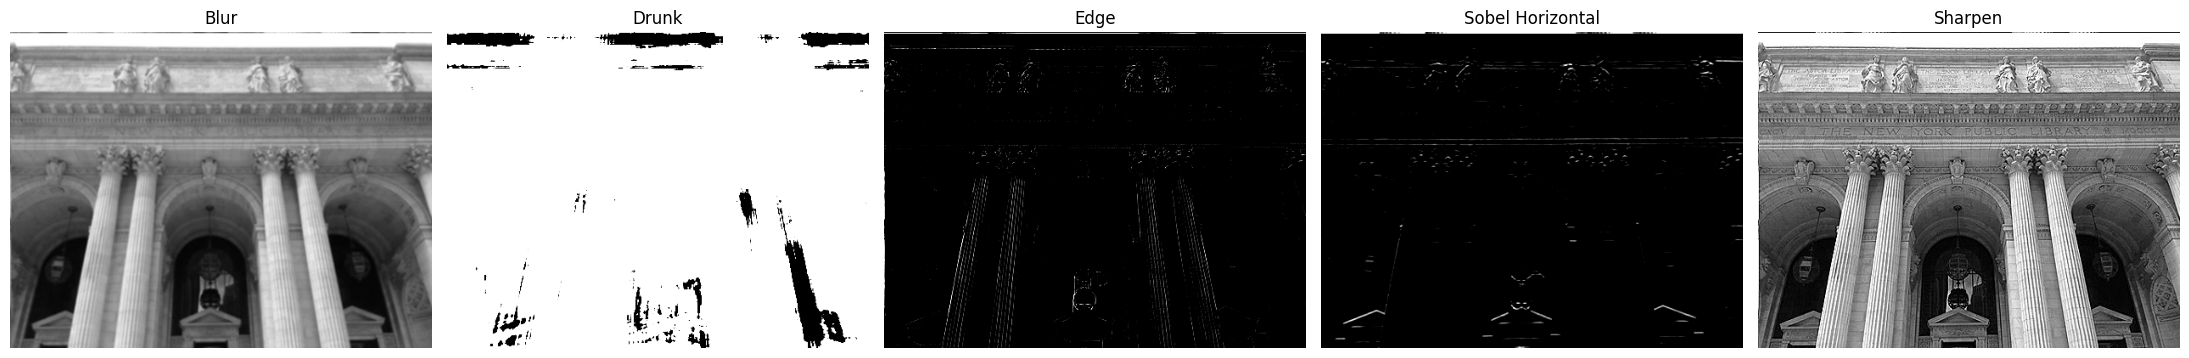

In [9]:
fig, axs = plt.subplots(1, len(kernels), figsize=(22, 8))
for ax, (k, title) in zip(axs, kernels, strict=False):
    img_fft = np.fft.fft2(v)
    k_fft = np.fft.fft2(k, s=v.shape)
    vk_fft = img_fft * k_fft
    filtered_img = np.fft.ifft2(vk_fft).real

    ax.imshow(filtered_img, cmap="gray", vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()

## 3. Using the command `scipy.signal.convolve`

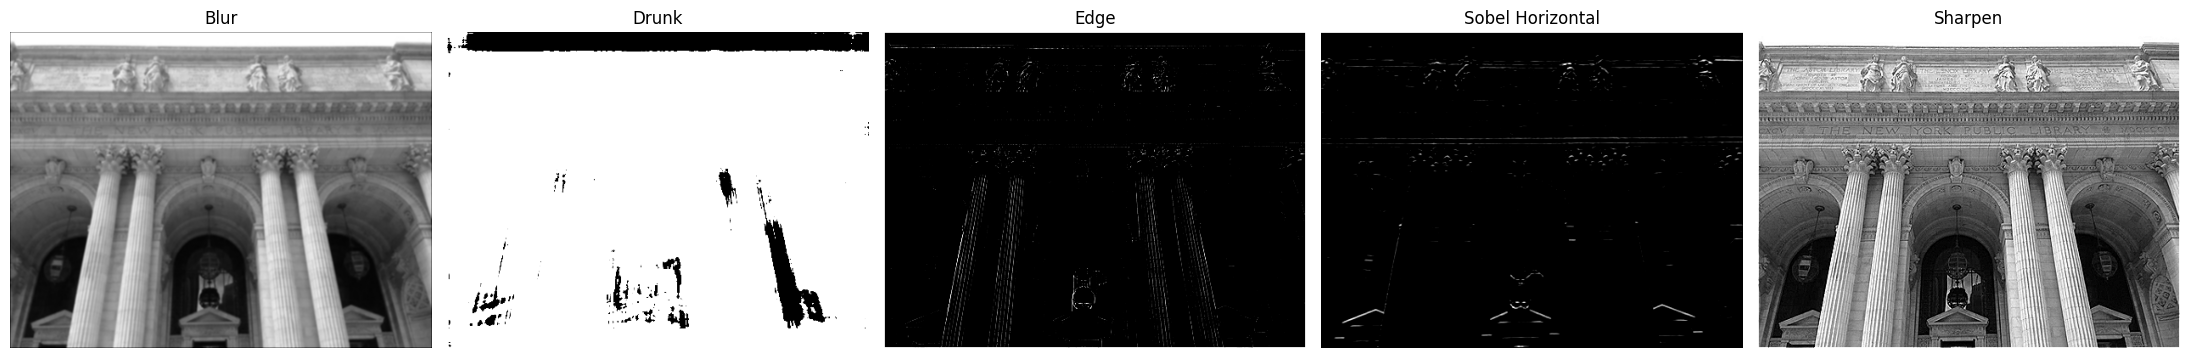

In [ ]:
fig, axs = plt.subplots(1, len(kernels), figsize=(22, 8))
for ax, (k, title) in zip(axs, kernels, strict=False):
    filtered_img = signal.convolve2d(v, k, mode="same")
    ax.imshow(filtered_img, cmap="gray", vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()